# Entregable Final


# Equipo Integrado por Sergio Antonio Moreno Banda y Ricardo David Minhot


## Tutora Maris Botero


# Datasets "Cancer de Pulmon" 


### Datos: (int), (str)

## Existen factores predisponentes en la enfermedad de cáncer de pulmón?
## Abstract:
### Se realizará un estudio desde la perspectiva de la existencia o no de factores predisponentes en el cáncer de pulmón. El cancer de pulmón, según el National Cancer institute, a diferencia de otros tipos de cáncer que aparecen más relacionados a variables como el sexo o la edad, es una enfermedad que afecta en igual medida a hombres y mujeres, siendo una de las enfermedades de cáncer más frecuentes en el mundo. Este trabajo está motivado por lograr desenmascarar aquellos factores predisponentes, si existieran, con el fin de prevenir, a la población humana, a una exposición prolongada en el tiempo a dichos factores.
### Sobre la base de un Dataset tomado del sitio Kaggle realizaremos un estudio a fin de evaluar la enfermedad de cancer de pulmón y desarrollar un modelo de Machine Learning capaz de predecir si una persona puede contraer o no la enfermedad.
### Se evaluará la relación entre las diferentes variables del modelo y la variable a analizar( cáncer de pulmón)
### En este trabajo definiremos una Ho (Hipótesis nula) de que no existen factores predisponentes a la aparición de cáncer de pulmón y una Hipótesis H1(Hipótesis alterntiva) de que si existen factores predisponentes a la aparición de cáncer de pulmón. 
### Serán elaborados gráficos con la utilización de librerías como Seaborn, Matplotlib, Scikit-learn, a fin de tener una visualización de la relación entre variables, cuantificación de casos, etc, a la vez que se intentarán definir insight que nos aporten valor a la investigación.
### Hipótesis nula (Ho) de que no existen factores predisponentes al origen del cáncer de pulmón en humanos, es decir que la ocurrencia de cáncer de pulmón es independiente de las demás variables a analizar sobre una muestra tomada al azar en una población y en un rango etario determinado. 
### Hipótesis alternativa (H1) de que la aparición de cáncer de pulmón tiene factores predisponentes.

## OBJETIVO:
### En base al análisis de hipótesis poder defininir la profilaxis a seguir a fin de evitar un desarrollo temprano de la enfermedad, minimizando el  riesgo, es decir elaborando un plan de aviso para evitar que los factores predisponentes  tengan una presencia significativa en la vida diaria de las personas en caso de que estos existan. Estimamos  que esto sería de importancia relevante para que las personas estén distanciadas de la enfermedad, que no solo ocaciona muertes de importancia en la población sino que también genera una calidad de vida deprimida para quienes la padecen.
## EDA:
### Se realizará un análisis exploratorio de datos preliminar con la utilización de diferentes librerías para visualización, comparando o relacionando las diferentes variables entre si.


##  Columnas Datasets de Cancer


GÉNERO: El género de los sujetos, M= masculino, F= femenino 
EDAD: La edad de los sujetos 
FUMAR: 2 si fuman y 1 si no lo hacen. 
YELLOW_FINGERS: 2 si tienen los dedos amarillos y 1 si no los tienen. 
ANSIEDAD: 2 si tienen están sufriendo de ansiedad y 1 si no lo están. 
PEER_PRESSURE: 2 si están influenciados por la presión de grupo y 1 si no lo están. 
ENFERMEDAD CRÓNICA: 2 si tienen una enfermedad crónica y 1 si no lo tienen. 
FATIGA: 2 si se fatigan fácilmente y 1 si no lo están 
ALERGIA: 2 si tienen alergia y 1 si no la tienen. 
SIBILANCIAS: 2 si jadean y 1 si no lo hacen. 
CONSUMO DE ALCOHOL: 2 si consumen alcohol y 1 si no lo hacen. 
TOS: 2 si tosen regularmente y1 si no lo hacen. 
DIFICULTAD PARA RESPIRAR: 2 si experimentan dificultad para respirar y 1 si no lo hacen. 
DIFICULTAD PARA TRAGAR: 2 si tienen problemas para tragar y 1 si no lo tienen. 
DOLOR EN EL PECHO: 2 si tienen dolor en el pecho y 1 si no lo tienen. 
LUNG_CANCER: Yes= si enfermos de cáncer de pulmón y No= si no lo son. 
Esta es la columna que estamos tratando de predecir.



In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#ruta= "C:/Users/Sergio-PC/Desktop/Data science/Datasets"

In [13]:
Cancer=pd.read_csv("C:/Users/David/Documents/Davo/cursos/data/Scientist/Cancer23.csv")

In [14]:
print(f"Forma del Conjunto de Datos : {Cancer.shape}")
print(f"\n\nVista del Conjunto de Datos :\n")
Cancer.head(5)

Forma del Conjunto de Datos : (1848, 16)


Vista del Conjunto de Datos :



,SEX,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Búsqueda de datos nulos (missing values)

In [15]:
Cancer.isnull().values.any()

False

##  Comprobaremos entradas duplicadas. Y eliminaremos los datos duplicados


In [16]:
dup = Cancer[Cancer.duplicated()].shape[0]
print(f"Hay {dup} entradas duplicadas entre {Cancer.shape[0]}  entradas en este conjunto de datos.")

Cancer.drop_duplicates(keep='first',inplace=True)
print(f"\nDespués de eliminar las entradas duplicadas hay {Cancer.shape[0]} entradas en este conjunto de datos.")

Hay 409 entradas duplicadas entre 1848  entradas en este conjunto de datos.

Después de eliminar las entradas duplicadas hay 1439 entradas en este conjunto de datos.


# Ingeniería de atributos:
## Vamos a otorgar valores de clase 0 (cáncer +) y 1 (cáncer -) a la feature LUNG_CANCER . 
## Otorgaremos clase 0 a masculino y 1 a femenino en la feature "SEX".

In [17]:
# label encoding
Cancer.replace({"LUNG_CANCER":{'YES':0,'NO':1}},inplace=True)
# label encoding
Cancer.replace({"SEX":{'M':0,'F':1}},inplace=True)
# printing the first 5 rows of the dataframe
Cancer= Cancer.drop('PEER_PRESSURE', axis=1)
Cancer.head(5)



,SEX,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,2,1,2,2,1,1,1


### Insight

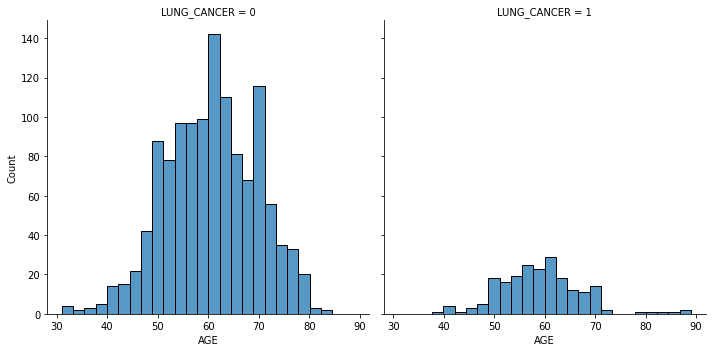

In [18]:
sns.displot(Cancer, x="AGE", col="LUNG_CANCER")

Distribution of cancer in the sample.
Positive Cancer=0, Negative Cancer=1)


<AxesSubplot:xlabel='LUNG_CANCER', ylabel='count'>

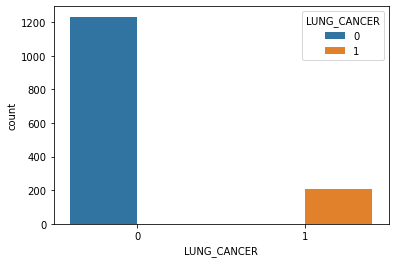

In [19]:
print('Distribution of cancer in the sample.')
print('Positive Cancer=0, Negative Cancer=1)')
sns.countplot(x='LUNG_CANCER',hue='LUNG_CANCER',data=Cancer)

Distribution of cancer according to gender.
GENDER M=0, F=1


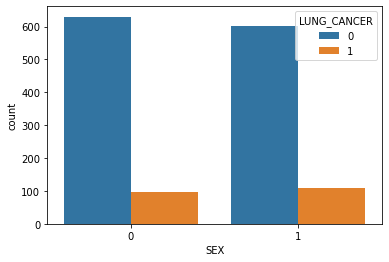

In [20]:
sns.countplot(x='SEX',hue='LUNG_CANCER',data=Cancer)
print("Distribution of cancer according to gender.")
print('GENDER M=0, F=1')

Distribution of cancer between smokers and non-smoker.
Smoking Yes=2, No=1
Lung Cancer Yes=0, No = 1


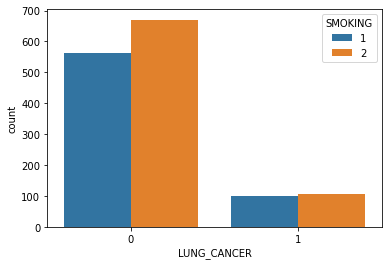

In [21]:
sns.countplot(x='LUNG_CANCER',hue='SMOKING',data=Cancer)
print("Distribution of cancer between smokers and non-smoker.")
print('Smoking Yes=2, No=1')
print("Lung Cancer Yes=0, No = 1")

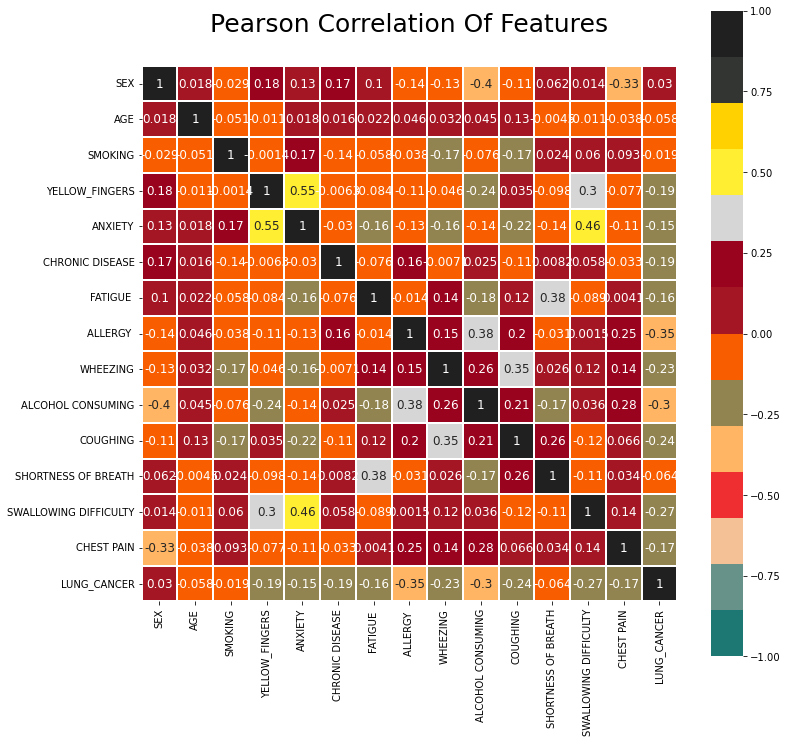

In [22]:
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]
plt.subplots(figsize=(12, 12))
p=sns.heatmap(Cancer.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99), 
            annot=True, vmin=-1, vmax=1, linewidths=0.3,linecolor='white',annot_kws=dict(fontsize =12))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

### En una primera aproximación a estas visualizaciones notamos una aparente independencia de la enfermedad en relación al sexoen cuanto a que existiera algún factor predisponente a la enfermedad. Se graficaron los datos a nivel univariado, bivariado y multivariado.
### También podemos visualizar la existencia de tres variables con mayor poder predictor que las demás como son 'Swallowing dificculty', 'Yellow fingers' y 'Anxiety'.

## El desafío siguiente esdefinir un modelo de Machine Learning de clasificación dado el tipo de datos categóricos y con etiqueta definida (LUNG_CANCER).

## Determinación de variable target(y) y predictoras (X).



In [23]:
#Cancer['LUNG CANCER'] = Cancer.target Este codigo si no está no afecta lo que sigue. Porqué?
X= Cancer.drop('LUNG_CANCER',1)
y= Cancer['LUNG_CANCER']
Cancer.head()

C:\Users\David\AppData\Local\Temp\ipykernel_1712\4154797266.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X= Cancer.drop('LUNG_CANCER',1)


,SEX,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,2,1,2,2,2,2,2,2,0
1,0,74,2,1,1,2,2,2,1,1,1,2,2,2,0
2,1,59,1,1,1,1,2,1,2,1,2,2,1,2,1
3,0,63,2,2,2,1,1,1,1,2,1,1,2,2,1
4,1,63,1,2,1,1,1,1,2,1,2,2,1,1,1


In [24]:
import statsmodels.api as sm
def forward_selection(Cancer, target, significance_level=0.05): 
    initial_features = Cancer.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(Cancer[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [25]:
forward_selection(X,y) 

C:\Users\David\AppData\Local\Temp\ipykernel_1712\2873425038.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\David\AppData\Local\Temp\ipykernel_1712\2873425038.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\David\AppData\Local\Temp\ipykernel_1712\2873425038.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\David\AppData\Local\Temp\ipykernel_1712\2873425038.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future versio

['ALLERGY ',
 'SWALLOWING DIFFICULTY',
 'COUGHING',
 'FATIGUE ',
 'ALCOHOL CONSUMING',
 'YELLOW_FINGERS',
 'CHRONIC DISEASE',
 'SMOKING',
 'ANXIETY',
 'WHEEZING']

In [26]:
Cancer= Cancer.drop(['SEX', 'AGE','SHORTNESS OF BREATH', 'CHEST PAIN'], axis=1)
Cancer.head()

,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,LUNG_CANCER
0,1,2,2,1,2,1,2,2,2,2,0
1,2,1,1,2,2,2,1,1,1,2,0
2,1,1,1,1,2,1,2,1,2,1,1
3,2,2,2,1,1,1,1,2,1,2,1
4,1,2,1,1,1,1,2,1,2,1,1


## Partición del dataset en grupo Test, Training y Validation.

In [27]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split #probar sacando X_scaled
# separating into train and testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.30, random_state=10, stratify=y)
# usaremos como validation
X_train,X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=11, stratify=y_train_val)

print('information about the dataset')
print('Total samples = {}'.format(X_train_val.shape[0] + X_test.shape[0]))
print('PARTITIONED CANCER DATASET')
print('======================')
print("Shape of X_train is " ,X_train.shape)
print("Shape of y_train is " ,y_train.shape)
print('% samples train: 0 : {:2.2f}%    1 : {:2.2f}%'.format(np.sum(y_train==0)/y_train.size*100, np.sum(y_train==1)/y_train.size*100))
print('======================')
print('X_val: {}'.format(X_val.shape))
print('y_val: {}'.format(y_val.shape))
print('% samples per class: 0 : {:2.2f}%    1 : {:2.2f}%'.format(np.sum(y_val==0)/y_val.size*100, np.sum(y_val==1)/y_val.size*100))
print('======================')
print("Shape of X_test  is " ,X_test.shape)
print("Shape of y_test  is " ,y_test.shape)
print('% samples test: 0 : {:2.2f}%    1 : {:2.2f}%'.format(np.sum(y_test==0)/y_test.size*100, np.sum(y_test==1)/y_test.size*100))
#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

information about the dataset
Total samples = 1439
PARTITIONED CANCER DATASET
Shape of X_train is  (906, 14)
Shape of y_train is  (906,)
% samples train: 0 : 85.65%    1 : 14.35%
X_val: (101, 14)
y_val: (101,)
% samples per class: 0 : 85.15%    1 : 14.85%
Shape of X_test  is  (432, 14)
Shape of y_test  is  (432,)
% samples test: 0 : 85.65%    1 : 14.35%


## Aplicación de modelo de regresión Logística y evaluación con Matriz de confusión.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics


Classification Report : 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       370
           1       0.69      0.65      0.67        62

    accuracy                           0.91       432
   macro avg       0.82      0.80      0.81       432
weighted avg       0.91      0.91      0.91       432


The Accuracy of Logistic Regression is 90.74 %


C:\Users\David\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\David\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

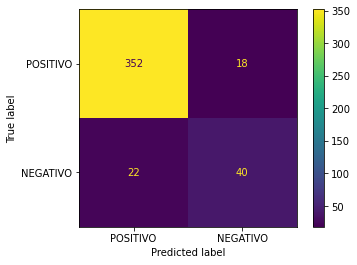

In [29]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(lr, X_test, y_test, display_labels=['POSITIVO', 'NEGATIVO'])

## Aplicación de modelo de Random Forest y evaluación con Matriz de confusión.

Confusion Matrix : 

[[361   9]
 [ 14  48]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       370
           1       0.84      0.77      0.81        62

    accuracy                           0.95       432
   macro avg       0.90      0.87      0.89       432
weighted avg       0.95      0.95      0.95       432


The Accuracy of Random Forest Classifier is 94.68 %


C:\Users\David\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

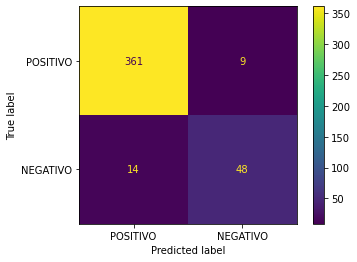

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(max_depth=6, n_estimators = 100, random_state = 42) 
rfg.fit(X_train, y_train)
rfg_pred = rfg.predict(X_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(rfg, X_test, y_test, display_labels=['POSITIVO', 'NEGATIVO'])

In [31]:
def error_tipo_dos (a,b,c,d):     # Representación de error tipo 2 en la matriz (a = FN, b= TP, c= TN, d;FP)
    error= (a/(a+b+c+d)*100)
    return error

#error_tipo_dos(16,354, 20, 42)
print(error_tipo_dos(9,361, 48, 14),'%')

2.083333333333333 %


## Conclusiones:
### Podemos observar un modelo de regresión logística que nos devuelve valores altos de Accuracy, Precisión y Recall. Por un lado nos otorga una buena predicción lo que lo hace seguro ante nuevas instancias y por otro lado tiene un error de tipo II bajo. Este último dato lo consideramos relevante ya que minimizaría descartar un posible Cáncer positivo en aquellos pacientes que si son cáncer positivo.
### Esto nos permite descartar la H0 y tomar como válida la H1, es decir, que existen factores predisponentes en la enfermedad y son la variables consideradas y evaluadas luego de definirlas en el Forward Selection.

